In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

In [213]:
data=pd.read_csv("Final_Diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,189,56,89,533,26.637558,2.465202,33,1
1,9,115,79,82,348,27.301961,1.695262,47,0
2,15,92,106,79,397,21.483862,1.561779,38,0
3,11,115,58,72,274,15.451017,0.663310,45,0
4,14,179,72,61,725,48.797996,0.252216,73,1
...,...,...,...,...,...,...,...,...,...
4995,11,154,89,23,667,31.545104,0.901156,59,1
4996,6,179,50,61,512,17.638450,1.424150,37,1
4997,5,114,60,27,572,34.228839,1.232788,36,0
4998,15,118,79,28,570,40.568408,0.626608,38,0


In [214]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [215]:
x=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in x:
    data[col]=data[col].replace(0,np.NaN)
    mean=int(data[col].mean(skipna=True))
    data[col]=data[col].replace(np.NaN,mean)

In [216]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8.475000,134.98040,80.130400,54.372200,425.384800,32.742047,1.284356,50.869800,0.618200
std,5.180149,37.91731,17.584085,25.935331,242.965412,10.111788,0.693494,17.666728,0.485877
min,0.000000,70.00000,50.000000,10.000000,1.000000,15.008868,0.080308,21.000000,0.000000
25%,4.000000,102.00000,65.000000,32.000000,215.000000,23.864798,0.692852,36.000000,0.000000
50%,8.000000,136.00000,80.000000,55.000000,429.000000,33.125206,1.283382,51.000000,1.000000
75%,13.000000,168.00000,96.000000,77.000000,636.000000,41.443057,1.872322,66.000000,1.000000
max,17.000000,200.00000,110.000000,99.000000,846.000000,49.974408,2.499902,81.000000,1.000000


In [217]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,189,56,89,533.0,26.637558,2.465202,33,1
1,9,115,79,82,348.0,27.301961,1.695262,47,0
2,15,92,106,79,397.0,21.483862,1.561779,38,0
3,11,115,58,72,274.0,15.451017,0.663310,45,0
4,14,179,72,61,725.0,48.797996,0.252216,73,1


In [218]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4995,11,154,89,23,667.0,31.545104,0.901156,59,1
4996,6,179,50,61,512.0,17.638450,1.424150,37,1
4997,5,114,60,27,572.0,34.228839,1.232788,36,0
4998,15,118,79,28,570.0,40.568408,0.626608,38,0
4999,1,132,52,42,55.0,29.887446,0.572953,27,0


In [219]:
count=data['Outcome'].value_counts()
print(count)

Outcome
1    3091
0    1909
Name: count, dtype: int64


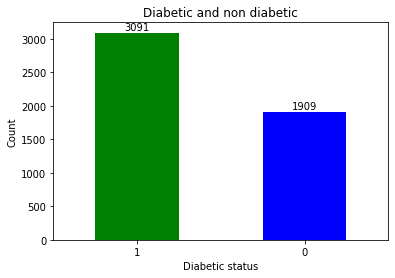

In [220]:
count.plot(kind='bar',color=['green','blue'])
plt.title("Diabetic and non diabetic")
plt.xlabel("Diabetic status")
plt.ylabel("Count")
plt.xticks(rotation=0)
for i, c in enumerate(count):
    plt.text(i, c + 5, str(c), ha='center', va='bottom')
plt.show()

In [221]:
print("Average age of individuals is: ",end='')
avg_age=data['Age'].mean()
print(avg_age)
print("Median age of individuals is: ",end='')
med_age=data['Age'].median()
print(med_age)

Average age of individuals is: 50.8698
Median age of individuals is: 51.0


<Axes: xlabel='Pregnancies', ylabel='Glucose'>

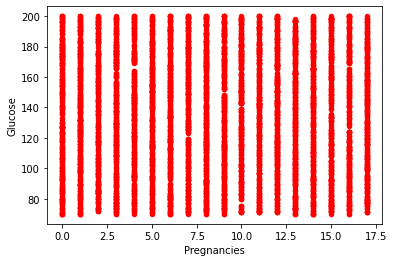

In [222]:
data.plot(kind='scatter',x='Pregnancies',y='Glucose',c='red')

Text(0.5, 0, 'Blood Pressure')

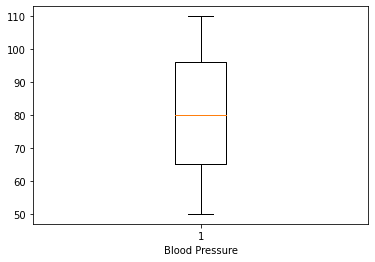

In [223]:
plt.boxplot(data['BloodPressure'])
plt.xlabel("Blood Pressure")

There are no outliers in blood pressure as there are no outliers in the boxplot

In [224]:
mean=data['BMI'].mean()
std=np.sqrt(data['BMI'].var())
print(mean)
print(std)

32.742046537128275
10.111788110518422


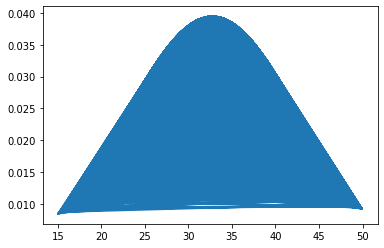

In [225]:
f=norm.pdf(data['BMI'],mean,std)
plt.plot(data['BMI'],f)

(array([313., 346., 330., 310., 339., 295., 334., 312., 357., 343., 359.,
        336., 349., 326., 351.]),
 array([15.00886786, 17.33990385, 19.67093984, 22.00197583, 24.33301182,
        26.66404781, 28.9950838 , 31.32611979, 33.65715578, 35.98819177,
        38.31922776, 40.65026375, 42.98129974, 45.31233573, 47.64337172,
        49.97440771]),
 <BarContainer object of 15 artists>)

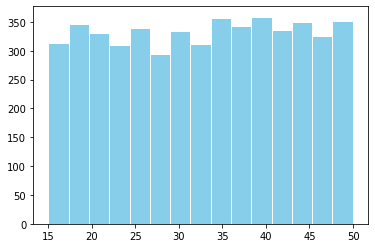

In [226]:
plt.hist(data['BMI'],color="skyblue",edgecolor='white',bins=15)

<Axes: xlabel='BMI', ylabel='SkinThickness'>

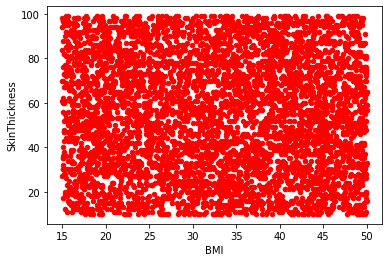

In [227]:
data.plot(kind='scatter',x='BMI',y='SkinThickness',c='red')

In [228]:
print("Correlation between BMI and SkinThickness is ",end='')
correlation=data['BMI'].corr(data['SkinThickness'])
if correlation>0.5:
    print("Positive")
else:
    print("Negative")

Correlation between BMI and SkinThickness is Negative


In [229]:
print("Do people with more pregnancies tend to be older?")
correlation=data['Pregnancies'].corr(data['Age'])
if(correlation>0):
    print("Yes")
else:
    print("No")

Do people with more pregnancies tend to be older?
Yes


<Axes: xlabel='Pregnancies', ylabel='Age'>

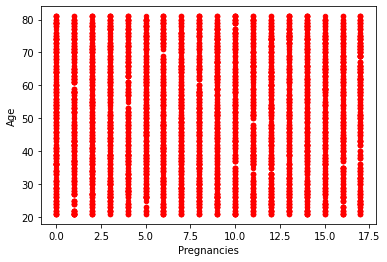

In [230]:
data.plot(kind='scatter',x='Pregnancies',y='Age',c='red')

<Axes: xlabel='Outcome', ylabel='Glucose'>

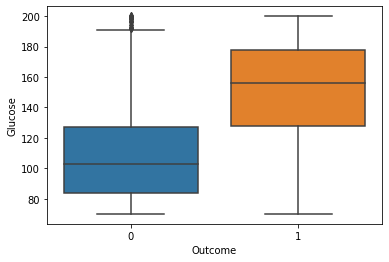

In [231]:
sns.boxplot(x='Outcome',y='Glucose',data=data)

<Axes: xlabel='Outcome', ylabel='Glucose'>

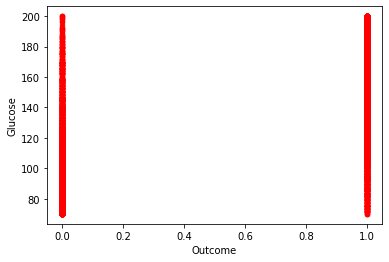

In [232]:
data.plot(kind='scatter',x='Outcome',y='Glucose',c='red')

In [233]:
print("Mean DiabetesPedigreeFunction of diabetic women is:",end='')
diab_mean=data[data['Outcome']==1]['DiabetesPedigreeFunction'].mean()
print(diab_mean)
print("Mean DiabetesPedigreeFunction of non-diabetic women is:",end='')
diab_mean=data[data['Outcome']==0]['DiabetesPedigreeFunction'].mean()
print(diab_mean)

Mean DiabetesPedigreeFunction of diabetic women is:1.3806148171989994
Mean DiabetesPedigreeFunction of non-diabetic women is:1.1284969665989129


In [234]:
print("Mean age of diabetic women is:",end='')
age_mean=data[data['Outcome']==1]['Age'].mean()
print(age_mean)
print("Mean age of non-diabetic women is:",end='')
age_mean=data[data['Outcome']==0]['Age'].mean()
print(age_mean)

Mean age of diabetic women is:54.53898414752507
Mean age of non-diabetic women is:44.92875851231011


In [235]:
print((data[(data['Age'] < 50) & (data['Outcome'] == 0)]).shape[0])
print((data[(data['Age'] > 50) & (data['Outcome'] == 1)]).shape[0])

1196
1846


Both the means are almost same and not much difference in count,hence we can say that diabetes doesnt depend on age

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

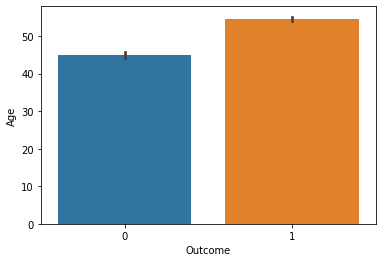

In [236]:
sns.barplot(x='Outcome', y='Age', data=data)
plt.xticks(rotation=0)

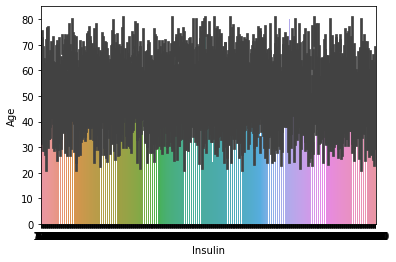

In [237]:
sns.barplot(x='Insulin', y='Age', data=data)
plt.xticks(rotation=0)
plt.show()

(array([568., 558., 529., 289., 576., 550., 262., 579., 540., 549.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

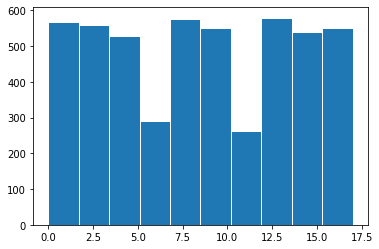

In [238]:
plt.hist(data['Pregnancies'],edgecolor='white')

<Axes: xlabel='BloodPressure', ylabel='Age'>

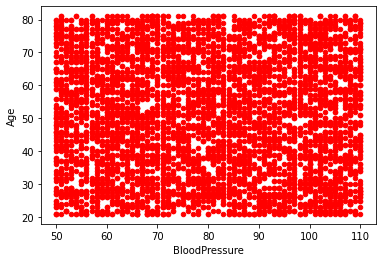

In [239]:
data.plot(kind='scatter',x='BloodPressure',y='Age',c='red')

In [240]:
data[col]=data['Outcome']
print("Correlation between BMI and SkinThickness is ",end='')
correlation=data['Pregnancies'].corr(data['Outcome'])
print(correlation)

Correlation between BMI and SkinThickness is 0.11069543037148165
